# Task 7: Customer Behavior Analysis

In [40]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [41]:
# Load the cleaned data from a CSV file into a Pandas DataFrame
data = pd.read_csv('cleaned_data.csv')
# Convert the 'CustomerID' column to a numerical format (Int64) for easier processing
data['CustomerID']=data['CustomerID'].astype('Int64')
# Convert the 'InvoiceDate' column to a datetime format for accurate date and time operations
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#### Plot the distribution of order quantities

In [42]:
# Check the frequency distribution of values in the 'Quantity' column
data['Quantity'].value_counts()

Quantity
1        73314
12       60033
2        58003
6        37688
4        32183
         ...  
4300         1
608          1
738          1
552          1
80995        1
Name: count, Length: 302, dtype: int64

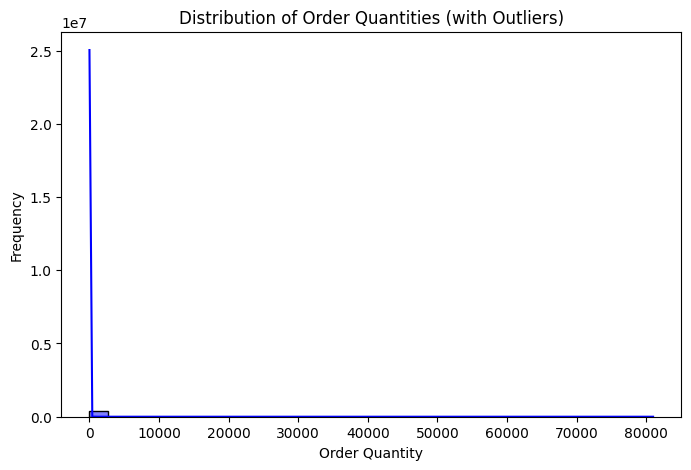

In [43]:
# Plot the distribution of order quantities (including outliers) using a histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 5))  # Set the figure size
sns.histplot(data['Quantity'], bins=30, kde=True, color='blue')  # Create the histogram with KDE overlay
plt.title('Distribution of Order Quantities (with Outliers)')  # Set the title of the plot
plt.xlabel('Order Quantity')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the plot

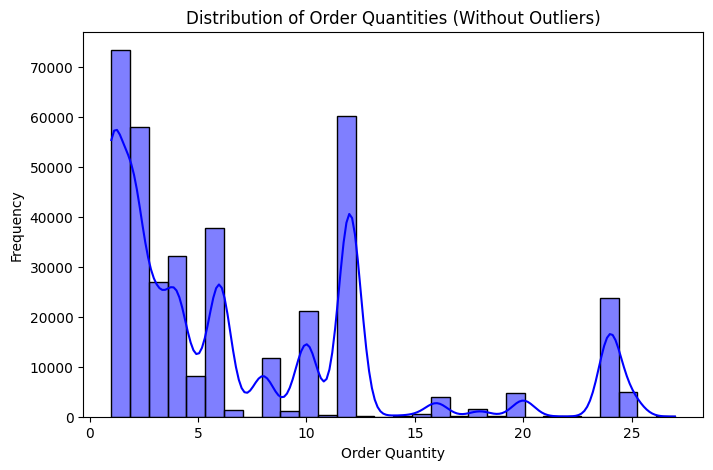

In [44]:
# Calculate the first (Q1) and third (Q3) quartiles of the 'Quantity' column
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter out rows that are considered outliers based on the IQR method
filtered_data = data[(data['Quantity'] >= Q1 - 1.5 * IQR) & (data['Quantity'] <= Q3 + 1.5 * IQR)]

# Plot the distribution of order quantities (without outliers) using a histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 5))  # Set the figure size
sns.histplot(filtered_data['Quantity'], bins=30, kde=True, color='blue')  # Create the histogram with KDE overlay
plt.title('Distribution of Order Quantities (Without Outliers)')  # Set the title of the plot
plt.xlabel('Order Quantity')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the plot


#### Scatter Plot of Quantity vs. TotalPrice

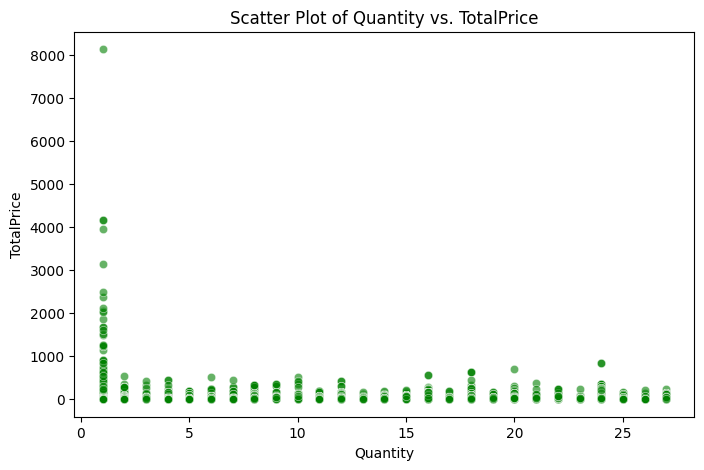

In [45]:
# Plot a scatter plot of 'Quantity' vs. 'TotalPrice' for the filtered data (with outliers)
plt.figure(figsize=(8, 5))  # Set the figure size
sns.scatterplot(data=filtered_data, x='Quantity', y='TotalPrice', alpha=0.6, color='green')  # Create the scatter plot
plt.title('Scatter Plot of Quantity vs. TotalPrice')  # Set the title of the plot
plt.xlabel('Quantity')  # Label the x-axis
plt.ylabel('TotalPrice')  # Label the y-axis
plt.show()  # Display the plot

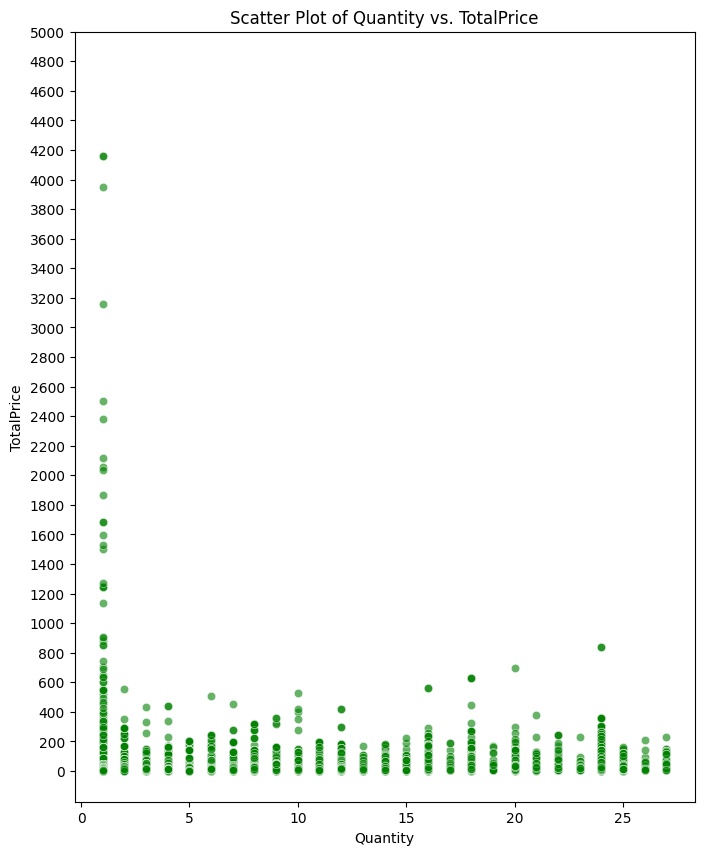

In [46]:
# Filter the data further to exclude 'TotalPrice' values that are greater than 5000 or less than 0
filtered_data_price = filtered_data[(filtered_data['TotalPrice'] < 5000) & (filtered_data['TotalPrice'] > 0)]

# Plot a scatter plot of 'Quantity' vs. 'TotalPrice' for the further filtered data
plt.figure(figsize=(8, 10))  # Set the figure size
sns.scatterplot(data=filtered_data_price, x='Quantity', y='TotalPrice', alpha=0.6, color='green')  # Create the scatter plot
y_ticks = np.arange(0, 5000 + 200, 200)  # Set the y-axis ticks from 0 to 5000 with 200 steps
plt.yticks(y_ticks)  # Apply the y-axis ticks
plt.title('Scatter Plot of Quantity vs. TotalPrice')  # Set the title of the plot
plt.xlabel('Quantity')  # Label the x-axis
plt.ylabel('TotalPrice')  # Label the y-axis
plt.show()  # Display the plot


#### Average Daily Sales Throughout the Week

C:\Users\Dell\AppData\Local\Temp\ipykernel_57756\1442264579.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='viridis')  # Create the bar plot


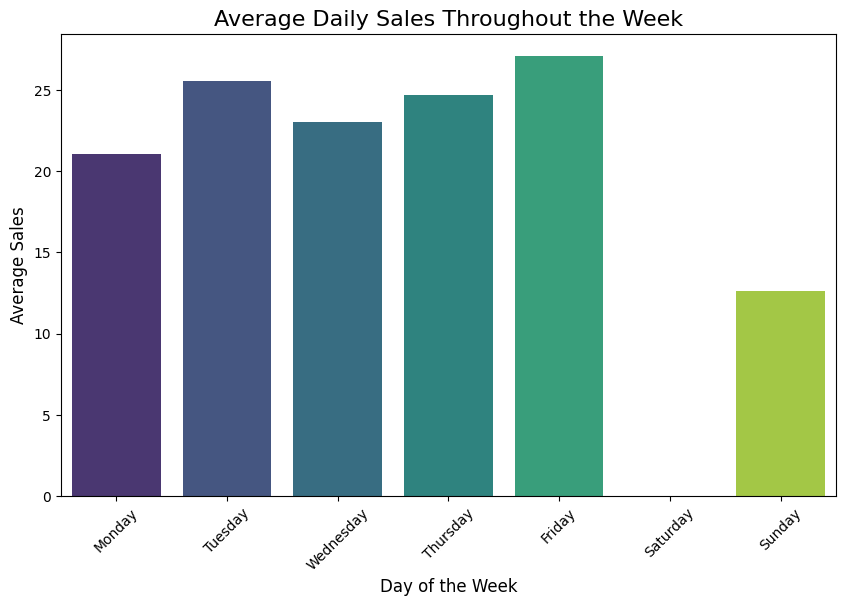

In [48]:
# Extract the day of the week from the 'InvoiceDate' column and add it as a new column
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

# Calculate the average total sales for each day of the week, ordered from Monday to Sunday
avg_sales = data.groupby('DayOfWeek')['TotalPrice'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the average sales for each day of the week using a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='viridis')  # Create the bar plot
plt.title('Average Daily Sales Throughout the Week', fontsize=16)  # Set the title of the plot
plt.xlabel('Day of the Week', fontsize=12)  # Label the x-axis
plt.ylabel('Average Sales', fontsize=12)  # Label the y-axis
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Set the font size for the y-axis ticks
plt.show()  # Display the plot